Testing Empirical cumulative distribution in 2-D

0.05788914818656496 0.030186582533625963


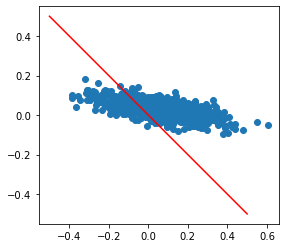

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

n=1000 #number data points
mean=[0.056,0.029] #mean
cov=[[0.0225,-0.0038],[-0.0038,0.0016]] #covariance matrix
x1,x2=np.random.multivariate_normal(mean,cov,n).T
ax1 = plt.scatter(x1,x2)
ax1 =plt.plot([-0.5,0.5],[0.5,-0.5],'r')
plt.gca().set_aspect('equal', adjustable='box')
mean_x1 = np.mean(x1)
mean_x2 = np.mean(x2)
print(mean_x1,mean_x2)

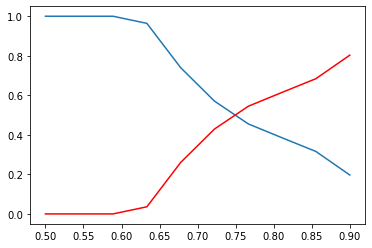

In [151]:
#Let's build a MILP
from mip import *

def myopt(alpha):
    d=2 #2-dimensional problem
    #alpha = 0.70 #significance level
    n_activeCon = np.ceil(n*alpha) #number of active constraints
    VaR = 0.0

    boundary = 10**6

    m = Model(solver_name=CBC)
    w = [ m.add_var(var_type=CONTINUOUS) for dd in range(d) ]
    z = [ m.add_var(var_type=BINARY) for nn in range(n) ] #deactivation switches


    #objective
    m.objective = minimize(-(w[0]*mean_x1+w[1]*mean_x2))

    #constaints
    m += xsum(w[dd] for dd in range(d)) == 1
    m += xsum(z[nn] for nn in range(n)) == (n-n_activeCon)

    for nn in range(n):
        m += w[0]*x1[nn]+w[1]*x2[nn] >= (VaR - z[nn]*boundary) #VaR constraint
    
    #obtain model summary
    #m.write('model.lp')
    #m.read('model.lp')
    #print('model has {} vars, {} constraints and {} nzs'.format(m.num_cols, m.num_rows, m.num_nz))

    # optimizing
    status = m.optimize()
    if status != OptimizationStatus.OPTIMAL:
        print(np.round(alpha,3), status)
    return m.vars[0].x

k = 10

alphas=np.linspace(0.5,0.9,k)
w0Star=np.zeros(k)

for i in range(k):
    w0Star[i] = myopt(alphas[i])

ax2=plt.plot(alphas,w0Star)
ax2=plt.plot(alphas,1-w0Star,'r')

In [133]:
print(-m.objective_value)
#for v in m.vars:
#       print('{} : {}'.format(v.name, v.x))

m.vars[0].x

0.042687228905083856


0.5606286767933971